# Revision General Data

### Machine Learning Technics

* Juan Camilo 
* Diego 
* Ricardo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import os
from mytimer import my_timer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def make_report(estimator,X_test,y_test, classes):
    y_pred = estimator.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, classes)
    report = classification_report(y_test,y_pred,output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report["accuracy"] = estimator.score(X_test, y_test)
    return df_report.iloc[:5,:]

def plot_matriz_confusion(y_test, y_pred):
    array = confusion_matrix(y_test, y_pred)
    filas = array.shape[0]
    colunas = array.shape[1]
    df_cm = pd.DataFrame(array, index = [i for i in range(filas)],
                  columns = [i for i in range(colunas)])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.2)
    sns.heatmap(df_cm, annot=True,fmt='g')

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    
    parameters
    ----------
    
    y_true:
    
    y_pred:
    
    classes: np.array()
    
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## 1. Exploración de Imagenes

#### - Lectura Imagen ejemplo

In [3]:
img_rgb = cv2.imread("./data/trainingset/0/img_1.jpg")
img_gray = mpimg.imread('./data/trainingset/0/img_1.jpg')

In [4]:
img_gray.shape

(28, 28)

#### - RGB & Gray Scale

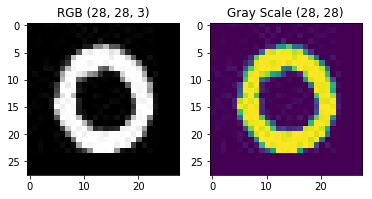

In [5]:
plt.subplot(121)
plt.imshow(img_rgb);
plt.title(f"RGB {img_rgb.shape}");

plt.subplot(122)
plt.imshow(img_gray);
plt.title(f"Gray Scale {img_gray.shape}");

#### - Visualización vectorial

In [6]:
print("Dimensión de la Imagen a escala de grises : \t",img_gray.shape)
print("Imagen redimensionada (ojetivo) : \t\t",img_gray.reshape(1,28*28).shape)

Dimensión de la Imagen a escala de grises : 	 (28, 28)
Imagen redimensionada (ojetivo) : 		 (1, 784)


## 2. Carga de imagenes y Vectorización 

En esta etapa nos centramos en la carga de las imagenes y construcción del la matrix de valores a partir de las mismas.

In [7]:
join = lambda x,y : os.path.join(x,y)

def _vectorizar(img_file):
    """
    Este metodo permite cargar una imagen y vectorizarla 
    completamente a partir de su dimensión original
    """
    matrix_img = mpimg.imread(img_file)
    in_shape = img_gray.shape
    out_shape = in_shape[0]*in_shape[1]
    return matrix_img.reshape(1,out_shape)[0]

In [8]:
def X_y(path, sample = None, verbose = False):
    """
    Este metodo recibe como parametro el directorio donde se encuentra el conjunto de dato, 
    Es importante mencionar que la disposición de la información en el sistema de administración
    de archivos debe contener las carpectas con los diferentes datos y el nombre de la carpeta
    debe specificar la etiqueta asociada al conjunto de archivos que esta misma contiene.
    
    parametros:
    -----------
    
    path: str
        Ruta del directorio que contiene la información bajo la estructura especificada anteriormente.
        
        Ejemplo:  path = /data/

        /data/
            1/
                imagen_1.bmp
                imagen_2.bmp
            2/
                imagen_3.bmp
                imagen_4.bmp
    
    sample: int 
        Número de muestas tomadas por directrio.
        
    verbose: bool
        Especifica si se desea observar los tiempos y avance del proceso por medio de una instancia de
        la clase "mytimer.my_timer".
    """
    generador_dirs = os.walk(path)
    sub_dirs_num = [{"dir":join(path,sdir),"y":int(sdir)} for sdir in next(generador_dirs)[1]]
    timer = my_timer(nombre="Lectura de directorios",total_iter=sub_dirs_num,verbose=verbose)
    
    X = []
    y = []
    
    for dic in sub_dirs_num:
        dir_img = dic["dir"]
        names_imgs = next(os.walk(dir_img))[2]
        if sample:
            names_imgs = names_imgs[:sample]

        _y = dic["y"]
        _X = [_vectorizar(join(dir_img,name_img)) for name_img in names_imgs]

        X += _X
        y += [_y]*len(_X)
        timer.iter(_y)
    timer.end()

    return np.array(X), np.array(y)

In [9]:
X, y = X_y("./data/trainingset/",verbose=True)

Iniciando el proceso Lectura de directorios...
Numero de iteraciones 10
[***---------------------------] | 10.00% : Tiempo:5.26s 	 || 9
[******------------------------] | 20.00% : Tiempo:9.96s 	 || 0
[*********---------------------] | 30.00% : Tiempo:14.73s 	 || 7
[************------------------] | 40.00% : Tiempo:19.26s 	 || 6
[***************---------------] | 50.00% : Tiempo:24.70s 	 || 1
[******************------------] | 60.00% : Tiempo:29.13s 	 || 8
[*********************---------] | 70.00% : Tiempo:35.39s 	 || 4
[************************------] | 80.00% : Tiempo:40.93s 	 || 3
[***************************---] | 90.00% : Tiempo:45.48s 	 || 2
[******************************] | 100.00% : Tiempo:49.98s 	 || 5
Total iteraciones para el proceso Lectura de directorios fue de: 10
Tiempo total: 49.975s
Tiempo medio: 4.997526288032532s


#### Dimensión del conjunto de Datos

In [10]:
X.shape

(42000, 784)

#### Datos de Entrada

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Datos de Salida

In [12]:
y

array([9, 9, 9, ..., 5, 5, 5])

### IMPORTANTE: BUG

Ya que el conjunto de test no se encuentra etiquetado, es necesario tomar algunas de las imagenes del conjunto de entrenamiento preciamente cargado. 

<b>Consultar con la profesora o el monitor !!!!</b>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y ,random_state=42)

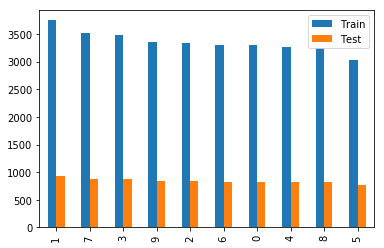

In [15]:
strain = pd.Series(y_train).value_counts()
stest  = pd.Series(y_test).value_counts()
pd.DataFrame({"Train":strain,"Test":stest}).plot(kind="bar");

### Nota:

Se observa que el conjunto de datos presenta un desbalance entre las clases, sin embargo se considera apropiado para tabajar directamente con el, sin la implementación de nunguna estratega de balanceo (Como el Algoritmo SMOTE)

## 3. Preparación de los datos

In [16]:
from sklearn.preprocessing import MinMaxScaler

#### - Escalador  lineal

In [17]:
scaler = MinMaxScaler(copy=True)
X_train = scaler.fit_transform(X_train.astype(np.float64))

#X_train /= 255
#X_test /= 255

## 4. ANN

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from numpy import argmax

In [19]:
y_train = to_categorical(y_train)

#### Classifier

In [20]:
classifier = Sequential()
classifier.add(Dense(units=25, activation="relu",input_shape=(784,)))
classifier.add(Dense(units=15, activation="relu"))
classifier.add(Dense(units=10, activation="softmax"))
classifier.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [63]:
classifier.fit(X_train, y_train, epochs=10 , batch_size=10, verbose=1);

Epoch 1/10
33600/33600 [==============================] - 12s 342us/step - loss: 0.4020 - categorical_accuracy: 0.8845
Epoch 2/10
33600/33600 [==============================] - 10s 288us/step - loss: 0.2105 - categorical_accuracy: 0.9358
Epoch 3/10
33600/33600 [==============================] - 11s 317us/step - loss: 0.1657 - categorical_accuracy: 0.9499
Epoch 4/10
33600/33600 [==============================] - 11s 316us/step - loss: 0.1404 - categorical_accuracy: 0.9571
Epoch 5/10
33600/33600 [==============================] - 11s 328us/step - loss: 0.1239 - categorical_accuracy: 0.9619
Epoch 6/10
33600/33600 [==============================] - 11s 339us/step - loss: 0.1097 - categorical_accuracy: 0.9652
Epoch 7/10
33600/33600 [==============================] - 11s 321us/step - loss: 0.0997 - categorical_accuracy: 0.9687
Epoch 8/10
33600/33600 [==============================] - 11s 325us/step - loss: 0.0918 - categorical_accuracy: 0.9710
Epoch 9/10
33600/33600 [========================

In [77]:
classifier

#### Predicciones

In [68]:
y_pred = classifier.predict(X_test)

#### Tranformación : [ [ ] ] -> [ ]

In [57]:
y_pred = argmax(y_pred, axis=1)

### Matriz de Confusión

Confusion matrix, without normalization


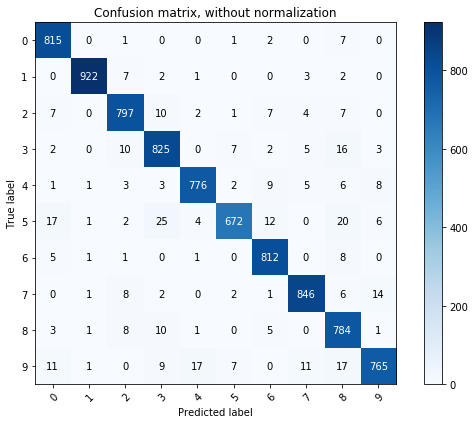

In [58]:
plot_confusion_matrix(y_pred=y_pred, y_true=y_test, classes=np.array(list(range(10))));

### IMPORTANTE: 

Se puede observar claramente que números con morfologia similar tienden clasisficaciones erroneas por parte de la red neuronal. Es claro que la mayor cantidad de clasificaciones erroneas se encuentran entre la clase "5" y la "3".

-----

## Entonación de Parametros

[grid example](https://www.kaggle.com/shujunge/gridsearchcv-with-keras)

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### Definición de método para generación de ANN

In [58]:
def myANN(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"],
          kernel_initializer="glorot_uniform",
          units_hiden_layeras = (25,15)):
    """
    Metodo apra la contruicción de una ANN bajo los parametos de entrada para el conjunto de datos
    de caracteres manuscritos.
    
    @IMPORTANTE: Método Altamente Harcodeado al problema!
    """
    classifier = Sequential()
    classifier.add(Dense(units=units_hiden_layeras[0], activation="relu",input_shape=(784,)))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units=units_hiden_layeras[1], activation="relu"))
    classifier.add(Dense(units=10, activation="softmax"))
    classifier.compile(optimizer=optimizer,loss=loss, metrics=metrics)
    return classifier

### Dicciónario params_grid

In [61]:
optimizers = ['adam']
kernel_initializer = ['glorot_uniform']
epochs = np.array([10])
batches = np.array([20])
units_hiden_layeras = [(25,15),(50,25),(100,50)]
param_grid = dict(optimizer=optimizers, kernel_initializer=kernel_initializer,
                  units_hiden_layeras = units_hiden_layeras,
                  epochs=epochs, batch_size=batches)
param_grid

{'optimizer': ['adam'],
 'kernel_initializer': ['glorot_uniform'],
 'units_hiden_layeras': [(25, 15), (50, 25), (100, 50)],
 'epochs': array([10]),
 'batch_size': array([20])}

### Wrapper Keras-Sklear

In [62]:
model = KerasClassifier(build_fn=myANN)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =5,n_jobs=-1,verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.1min finished


Epoch 1/10
33600/33600 [==============================] - 14s 416us/step - loss: 0.3605 - acc: 0.8914
Epoch 2/10
33600/33600 [==============================] - 8s 248us/step - loss: 0.1750 - acc: 0.9472
Epoch 3/10
33600/33600 [==============================] - 9s 261us/step - loss: 0.1351 - acc: 0.9567
Epoch 4/10
33600/33600 [==============================] - 10s 305us/step - loss: 0.1079 - acc: 0.9653
Epoch 5/10
33600/33600 [==============================] - 9s 270us/step - loss: 0.0959 - acc: 0.9690
Epoch 6/10
33600/33600 [==============================] - 9s 271us/step - loss: 0.0850 - acc: 0.9723
Epoch 7/10
33600/33600 [==============================] - 9s 260us/step - loss: 0.0727 - acc: 0.9765
Epoch 8/10
33600/33600 [==============================] - 9s 259us/step - loss: 0.0690 - acc: 0.9772
Epoch 9/10
33600/33600 [==============================] - 9s 259us/step - loss: 0.0611 - acc: 0.9801
Epoch 10/10
33600/33600 [==============================] - 9s 264us/step - loss: 0.0591 -

## Best Estimator

In [63]:
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_)) 
print("Best set score: {:.2f}".format(grid.score(X_test, y_test))) 
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.97
8400/8400 [==============================] - 3s 374us/step
Best set score: 0.97
Best parameters:  {'batch_size': 20, 'epochs': 10, 'kernel_initializer': 'glorot_uniform', 'optimizer': 'adam', 'units_hiden_layeras': (100, 50)}


In [72]:
y_pred = grid.best_estimator_.predict(X_test)

### Matriz de Confusión

Confusion matrix, without normalization


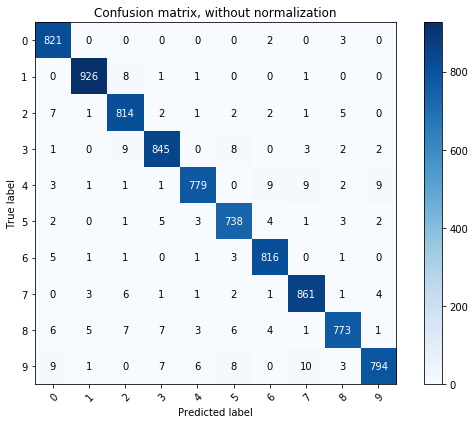

In [74]:
plot_confusion_matrix(y_pred=y_pred, y_true=y_test, classes=np.array(list(range(10))));

In [76]:
grid.best_estimator_

### IMPORTANTE: 

Se puede observar una alta exactitud del modelo ANN sobre el conjunto de datos de Test. Es claro que la exactitud del modelo sobre el conjunto de entrenamiento por medio de validación cruzada no se diferencia significativamente de la respuesta encontrada sobre el conjunto de prueba; esto suguiere una buena partición de la data y un rendimiento adecuado del modelo.